In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from cal_angle import GetClockAngle

In [2]:
PATH1 = 'C:\\Users\\23687\\Desktop\\APMCM\\2021 APMCM Problems\\2021 APMCM Problem A\\Annex 3\\EdgeContour1.xls'
PATH2 = 'C:\\Users\\23687\\Desktop\\APMCM\\2021 APMCM Problems\\2021 APMCM Problem A\\Annex 3\\EdgeContour2.xls'
data = pd.read_excel(PATH2,header=None)

In [3]:
E1_break_mark = np.load('E1_break_mark.npy')
E1_everypoint_ID = np.load('E1_everypoint_ID.npy')
E2_break_mark = np.load('E2_break_mark.npy')
E2_everypoint_ID = np.load('E2_everypoint_ID.npy')

In [4]:
i = 0  #第几段
pointsets = []
targets = []
for i in range(len(E2_break_mark)-1):
   pointsets.append(data[E2_break_mark[i]:E2_break_mark[i+1]].values)
   tmp = np.mean(E2_everypoint_ID[E2_break_mark[i]:E2_break_mark[i+1]])
   if tmp >= 0.5:
      tmp = 1
   else:
      tmp = 0
   targets.append(tmp)
t1 = data[E2_break_mark[-1]:].values
t2 = data[:E2_break_mark[0]].values
tmp = (np.mean(E2_everypoint_ID[E2_break_mark[-1]:]) + np.mean(E2_everypoint_ID[:E2_break_mark[0]]))/2
if tmp >= 0.5:
   tmp = 1
else:
   tmp = 0
pointsets.append(np.concatenate([t1,t2]))
targets.append(tmp)
len(pointsets)

C:\Users\23687\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\23687\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


86

In [193]:
flag = 0

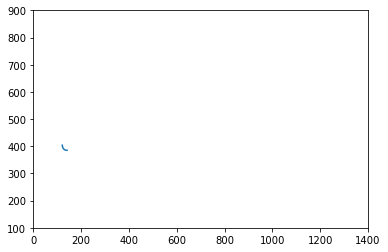

1


In [194]:
x = [i[0] for i in pointsets[flag]]
y = [i[1] for i in pointsets[flag]]
plt.plot(x, y)
plt.xlim((0, 1400))
plt.ylim((100, 900))
plt.show()
print(targets[flag])
flag += 1

In [196]:
pointsets[24]

array([[581.1083, 522.9252],
       [581.4189, 523.4103],
       [581.9315, 524.05  ],
       [582.4195, 524.6837],
       [582.7843, 525.165 ],
       [583.2623, 525.7943],
       [583.6548, 526.2742],
       [584.1404, 526.886 ],
       [584.5382, 527.3798],
       [585.0426, 527.9644],
       [585.5838, 528.5031],
       [585.962 , 529.0326],
       [586.4791, 529.5805],
       [586.8973, 530.0912],
       [587.4014, 530.6347],
       [587.8528, 531.1364],
       [588.3517, 531.6658],
       [588.8303, 532.1642],
       [589.3278, 532.6757],
       [589.8278, 533.1733],
       [590.3253, 533.6658],
       [590.8431, 534.1641],
       [591.3419, 534.6349],
       [591.8756, 535.1356],
       [592.3785, 535.5777],
       [592.9262, 536.0845],
       [593.4396, 536.4846],
       [593.9944, 537.0067],
       [594.5756, 537.5227],
       [595.0771, 537.9034],
       [595.6917, 538.3921],
       [596.1725, 538.7781],
       [596.8044, 539.2552],
       [597.2824, 539.6271],
       [597.91

In [186]:
flag

25

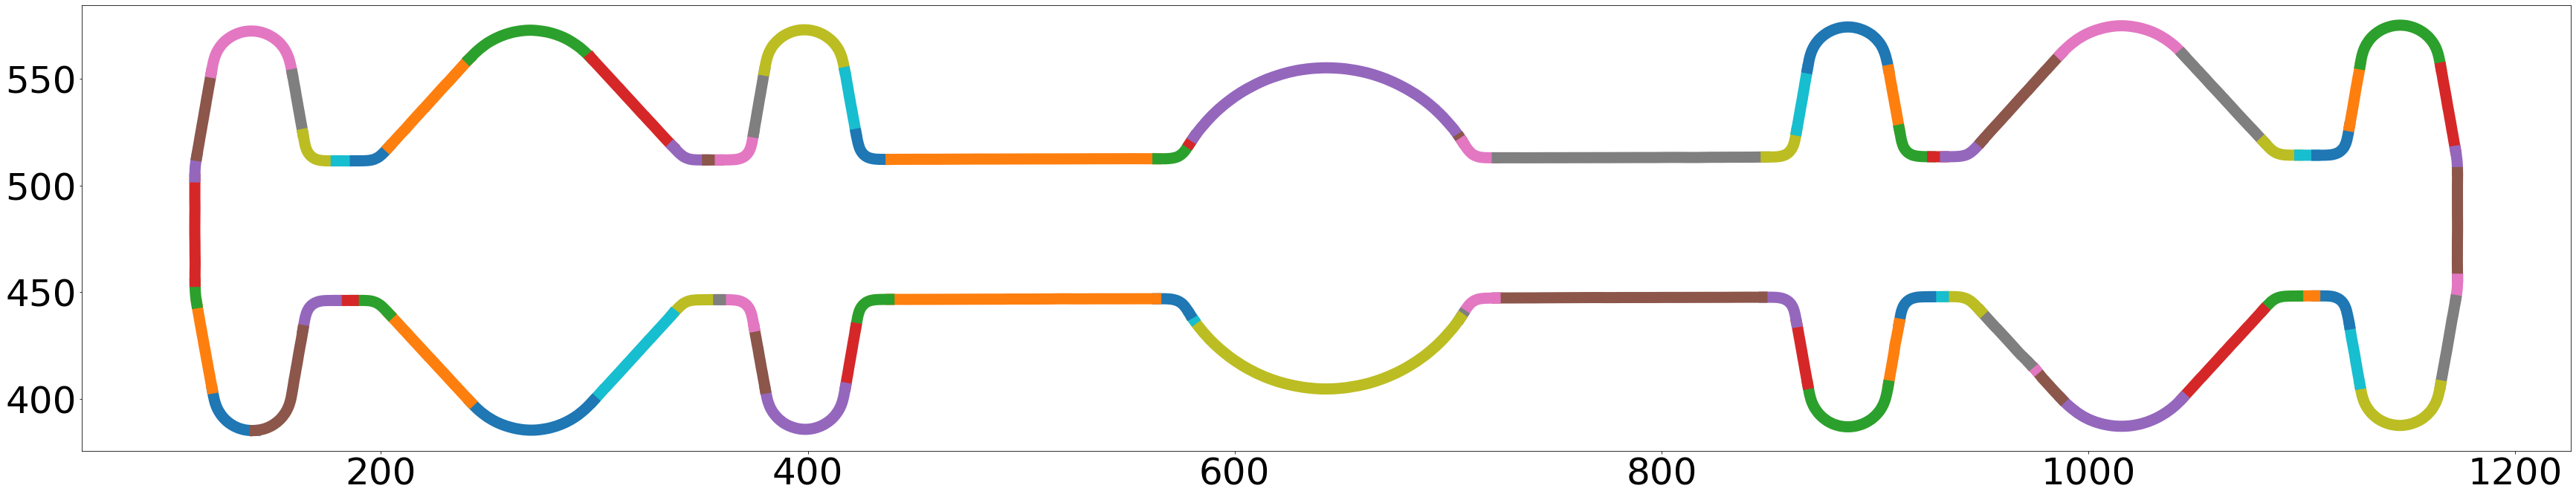

In [8]:
type_dict = {1:"Ellipse", 0:"Line"}
plt.figure(figsize=(12*5,8*5))
plt.tick_params(labelsize=50)
plt.gca().set_aspect('equal', 'box')

for i in range(len(pointsets)):
    # print(f"{type_dict[targets[i]]},{tuple(pointsets[i][0])},{tuple(pointsets[i][-1])}")
    x = [p[0] for p in pointsets[i]]
    y = [p[1] for p in pointsets[i]] 
    plt.plot(x, y,linewidth=15)
    # plt.scatter(x[0], y[0],linewidth=15)
    # plt.scatter(x[-1], y[-1])
plt.savefig(fname="Q3_2.png")
plt.show()

In [28]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [29]:
eng.cd('D:\\PycharmProjects\\APMCM\\Q3',nargout=0)
params = eng.fitellipse(matlab.double(x), matlab.double(y))
params

matlab.double([[148.33499299979468,418.19229096812114,35.51728881980972,24.412652238890153,1.0505876491408714]])

In [115]:
for i in range(len(pointsets)):
    if targets[i] == 0:
        x = [p[0] for p in pointsets[i]]
        y = [p[1] for p in pointsets[i]]
        L = ((x[0]-x[-1])**2 + (y[0]-y[-1])**2)**0.5
        print(f"id:{i},{type_dict[targets[i]]},{tuple(pointsets[i][0])},{tuple(pointsets[i][-1])},{int(L)}pixel")
        
    if targets[i] == 1:
        x = [p[0] for p in pointsets[i]]
        y = [p[1] for p in pointsets[i]]
        params = eng.fitellipse(matlab.double(x), matlab.double(y))

        """计算扫描角"""
        start_point = pointsets[i][0]
        center_point = np.array(params[0][:2])
        end_point = pointsets[i][-1]
        v1 = start_point - center_point
        v2 = end_point - center_point
        angel = GetClockAngle(v1, v2)

        print(f"id:{i},{type_dict[targets[i]]},{(params[0][0],params[0][1])},{[params[0][2],params[0][3]]},{tuple(pointsets[i][0])},{tuple(pointsets[i][-1])},{angel}°,{params[0][-1] * 180 /math.pi}°")

id:0,Ellipse,(147.05401107679992, 414.7780242384892),[23.33707763242815, 31.917199889137205],(140.9954, 385.0894),(120.9895, 403.9981),-55.99660396047417°,-32.30290569928653°
id:1,Line,(120.8175, 404.9679),(113.7888, 443.9657),39pixel
id:2,Ellipse,(114.17395678416533, 451.1668416792092),[1.222145711588296, 8.513014549885856],(113.6265, 444.9419),(112.8842, 453.9991),-150.4903936277484°,2.731628868583927°
id:3,Line,(112.8771, 454.9994),(112.8114, 503.0009),48pixel
id:4,Ellipse,(113.90799953556271, 507.8504103116168),[7.063272511390873, 0.9835983257535034],(112.8165, 504.0008),(113.5875, 513.0665),-160.65402209556916°,86.09636002333436°
id:5,Line,(113.7567, 514.0403),(120.3404, 551.9445),38pixel
id:6,Ellipse,(139.43948099212258, 552.9300406014829),[19.50135140557005, 18.643419016005172],(120.5507, 553.0746),(158.3134, 553.0549),-179.1824815429621°,-83.05439453501442°
id:7,Line,(158.5318, 551.9186),(163.29, 525.0499),27pixel
id:8,Ellipse,(175.50295375576485, 523.4979774329743),[11.2848979